In [31]:
#Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
!pip install openpyxl

In [120]:
#Reading the excel dataset

df = pd.read_excel('Myexcel.xlsx')
df

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,2025-02-06 00:00:00,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,2025-06-06 00:00:00,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,2025-05-06 00:00:00,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,2025-05-06 00:00:00,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,2025-10-06 00:00:00,231,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8,PG,26,2025-03-06 00:00:00,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,2025-01-06 00:00:00,179,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,2025-03-07 00:00:00,256,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24,C,26,7-0,231,Kansas,947276.0


In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      458 non-null    object 
 1   Team      458 non-null    object 
 2   Number    458 non-null    int64  
 3   Position  458 non-null    object 
 4   Age       458 non-null    int64  
 5   Height    458 non-null    object 
 6   Weight    458 non-null    int64  
 7   College   374 non-null    object 
 8   Salary    447 non-null    float64
dtypes: float64(1), int64(3), object(5)
memory usage: 32.3+ KB


In [205]:
# Correct the data in the "height" column by replacing it with random numbers between 150 and 180. Ensure data consistency and integrity before 
# proceeding with analysis.
np.random.seed(42) #for same output
df['Height'] = np.random.randint(150,180,size=len(df))

In [206]:
df

,Name,Team,Number,Position,Age,Height,Weight,College,Salary,Age Group
0,Avery Bradley,Boston Celtics,0,PG,25,156,180,Texas,7730337.0,21–30
1,Jae Crowder,Boston Celtics,99,SF,25,169,235,Marquette,6796117.0,21–30
2,John Holland,Boston Celtics,30,SG,27,178,205,Boston University,NaN,21–30
3,R.J. Hunter,Boston Celtics,28,SG,22,164,185,Georgia State,1148640.0,21–30
4,Jonas Jerebko,Boston Celtics,8,PF,29,160,231,NaN,5000000.0,21–30
...,...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8,PG,26,170,203,Butler,2433333.0,21–30
454,Raul Neto,Utah Jazz,25,PG,24,155,179,NaN,900000.0,21–30
455,Tibor Pleiss,Utah Jazz,21,C,26,152,256,NaN,2900000.0,21–30
456,Jeff Withey,Utah Jazz,24,C,26,177,231,Kansas,947276.0,21–30


In [207]:
df.to_excel("cleaned_dataset.xlsx", index=False)

In [123]:
# Determine the distribution of employees across each team and calculate the percentage split relative to the total number of employees.
team_count = df['Team'].value_counts()
team_percentage = (team_count/len(df)) * 100

team_distribution = pd.DataFrame({'Team': team_count.index,'Team_Count': team_count.values,'Team_Percentage': team_percentage.values})
team_distribution

,Team,Team_Count,Team_Percentage
0,New Orleans Pelicans,19,4.148472
1,Memphis Grizzlies,18,3.930131
2,Utah Jazz,16,3.493450
3,Milwaukee Bucks,16,3.493450
4,New York Knicks,16,3.493450
5,Boston Celtics,15,3.275109
6,Los Angeles Clippers,15,3.275109
7,Los Angeles Lakers,15,3.275109
8,Phoenix Suns,15,3.275109
9,Sacramento Kings,15,3.275109


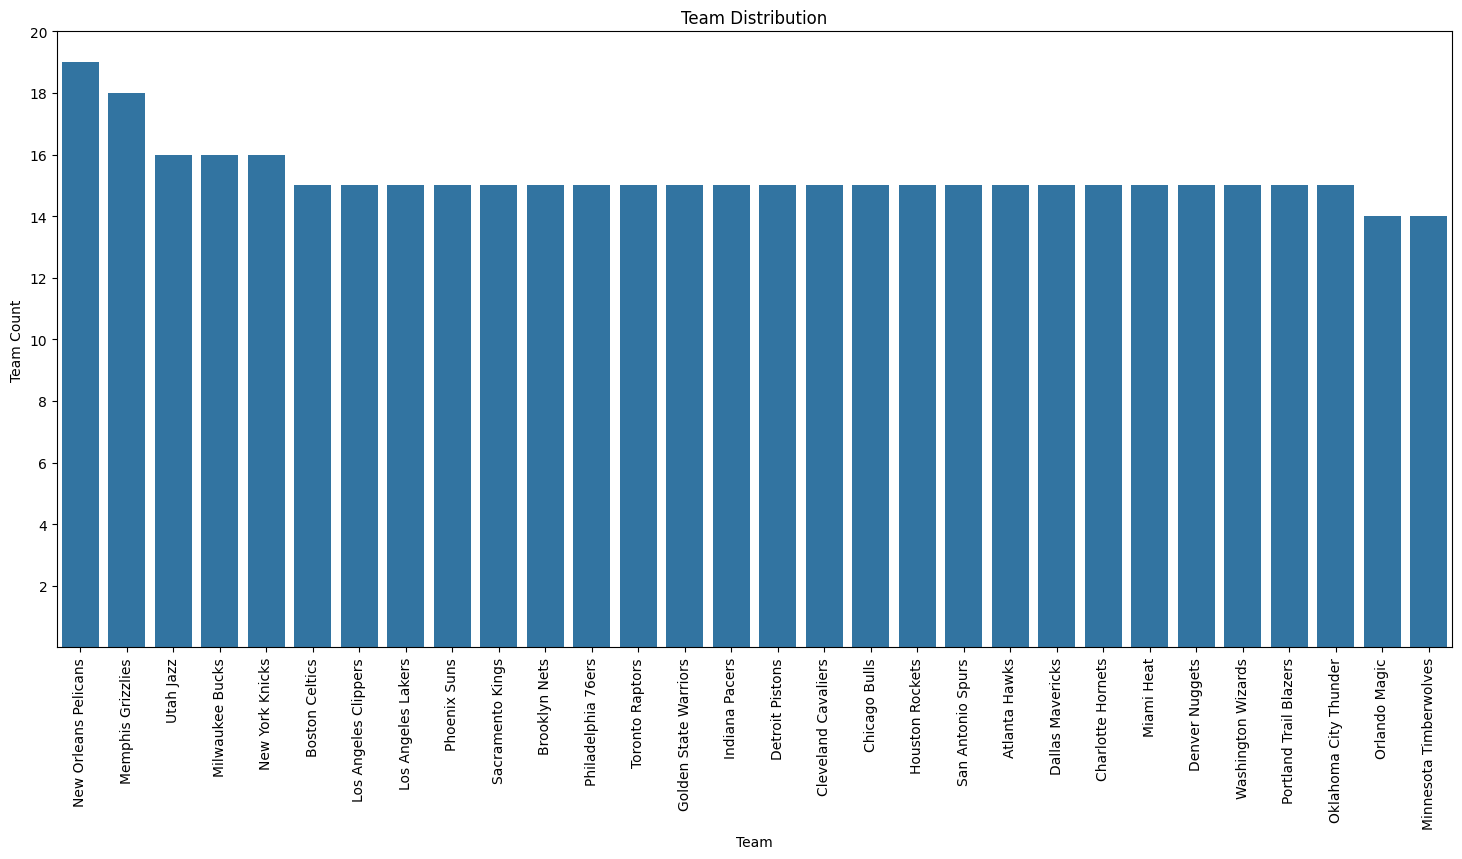

In [221]:
plt.figure(figsize=(18,8))
sns.barplot(data=team_distribution,x='Team',y='Team_Count')

plt.title('Team Distribution')
plt.xlabel('Team')
plt.ylabel('Team Count')
plt.xticks(rotation=90)
plt.yticks([2,4,6,8,10,12,14,16,18,20])
plt.show()

In [98]:
# Segregate employees based on their positions within the company. 
position_dist = df['Position'].value_counts().reset_index()
position_dist

,Position,count
0,SG,102
1,PF,100
2,PG,92
3,SF,85
4,C,79


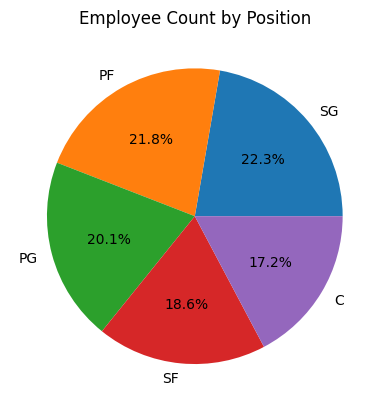

In [217]:
plt.pie(position_dist['count'],labels=position_dist['Position'],autopct='%1.1f%%')
plt.title('Employee Count by Position')
plt.show()

In [176]:
# Identify the predominant age group among employees.
df['Age Group'] = pd.cut(df['Age'], bins=[10, 20, 30, 40, 50], labels=['11–20', '21–30', '31–40', '41–50'])
age_group_dist = df['Age Group'].value_counts().sort_index().reset_index()
age_group_dist.columns = ['Age Group', 'Count']
age_group_dist

,Age Group,Count
0,11–20,21
1,21–30,346
2,31–40,91
3,41–50,0


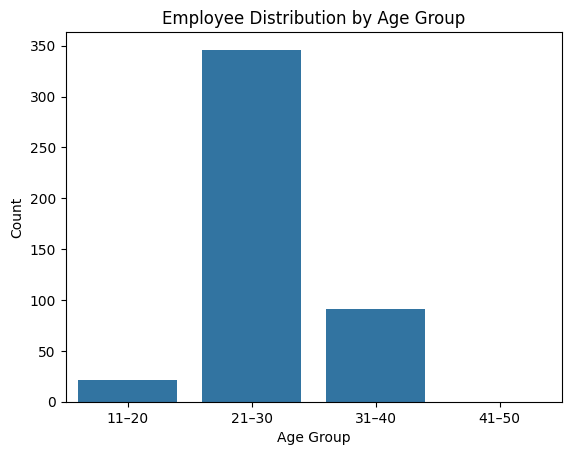

In [177]:
sns.barplot(data=age_group_dist, x='Age Group', y='Count')
plt.title('Employee Distribution by Age Group')
plt.show()

In [223]:
# Discover which team and position have the highest salary expenditure.
by_team = df.groupby('Team')['Salary'].sum().reset_index().sort_values(by='Salary', ascending=False)
by_position = df.groupby('Position')['Salary'].sum().reset_index().sort_values(by='Salary', ascending=False)
by_team

,Team,Salary
5,Cleveland Cavaliers,106988689.0
12,Los Angeles Clippers,94854640.0
20,Oklahoma City Thunder,93765298.0
9,Golden State Warriors,88868997.0
4,Chicago Bulls,86783378.0
26,San Antonio Spurs,84442733.0
18,New Orleans Pelicans,82750774.0
15,Miami Heat,82515673.0
3,Charlotte Hornets,78340920.0
14,Memphis Grizzlies,76550880.0


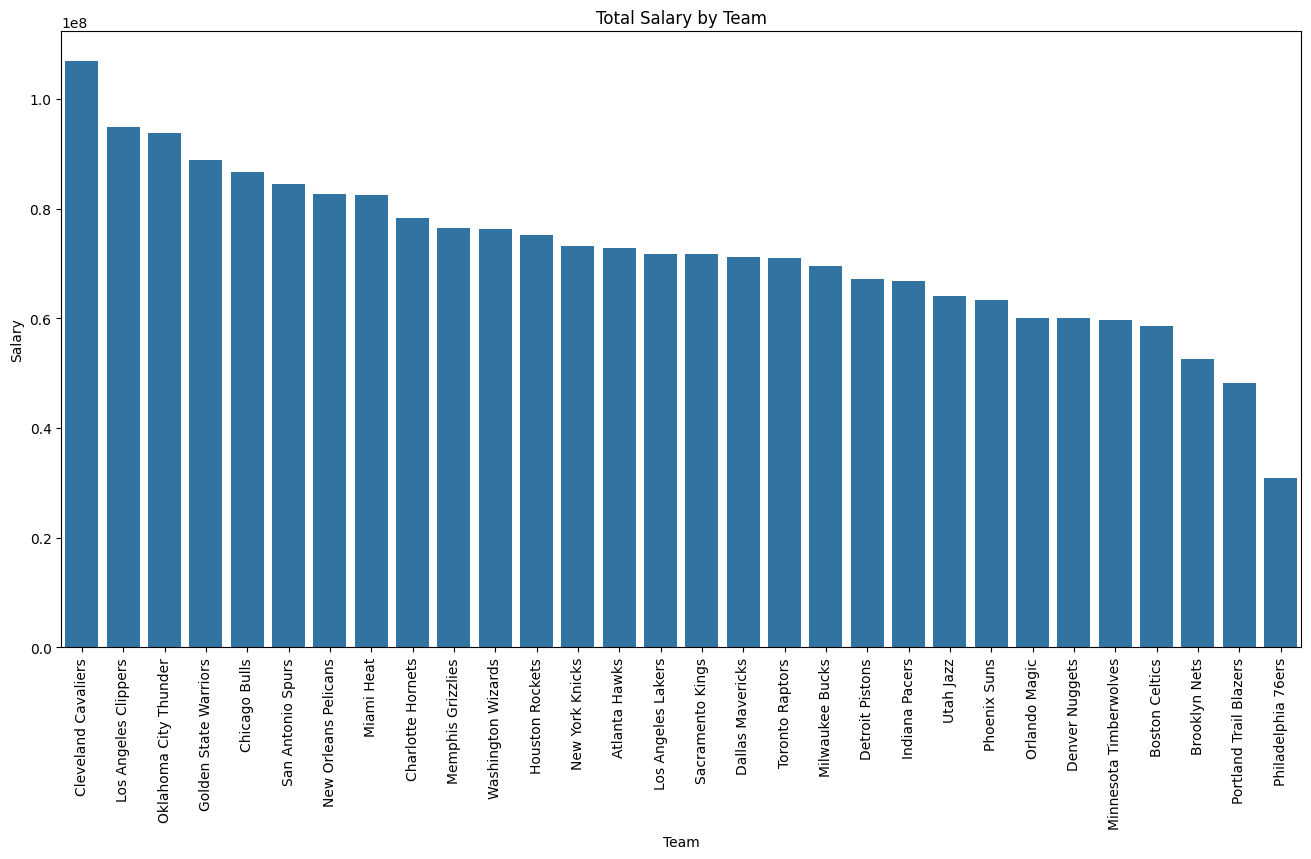

In [225]:
plt.figure(figsize=(16,8))
sns.barplot(data=by_team, x='Team', y='Salary')
plt.title('Total Salary by Team')
plt.xticks(rotation=90)
plt.show()



In [227]:
by_position

,Position,Salary
0,C,466377332.0
2,PG,446848971.0
1,PF,442560850.0
3,SF,408020976.0
4,SG,396976258.0


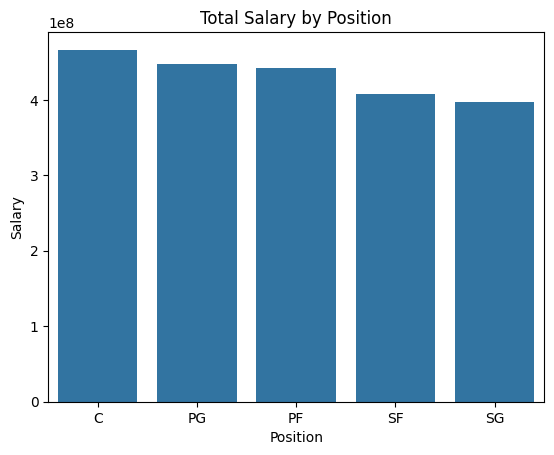

In [229]:
sns.barplot(data=by_position, x='Position', y='Salary')
plt.title('Total Salary by Position')
plt.show()

In [188]:
# Investigate if there's any correlation between age and salary, and represent it visually.
correlation = df[['Age', 'Salary']].corr().loc['Age', 'Salary']
correlation

np.float64(0.21400941226570955)

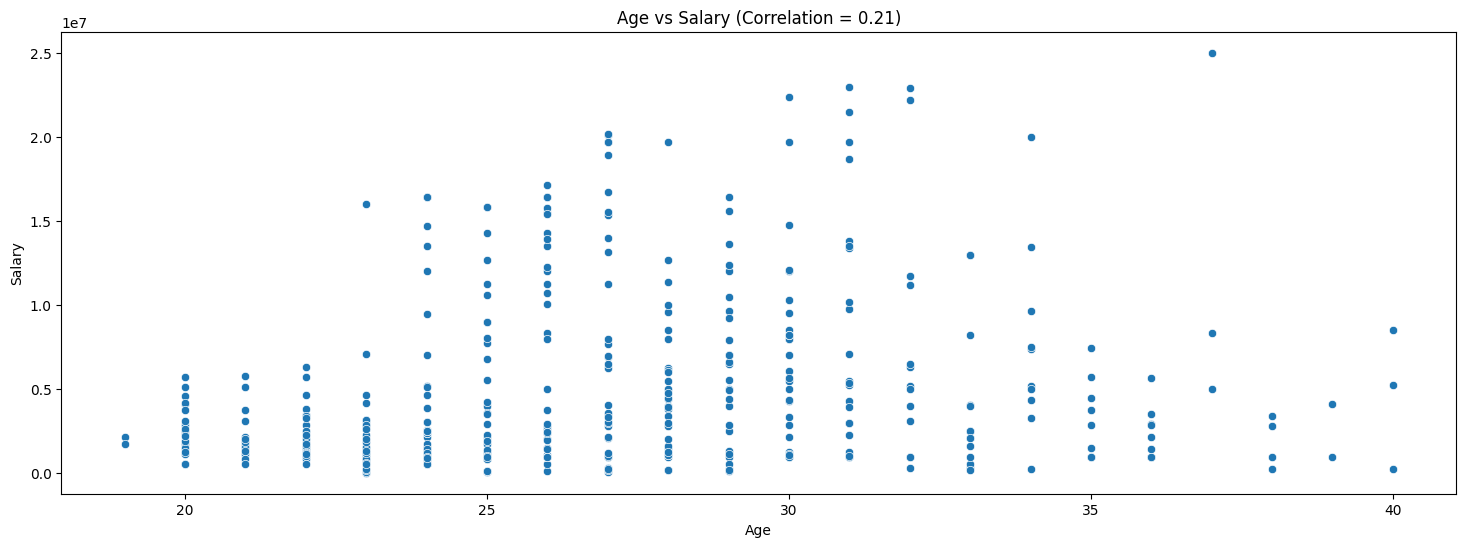

In [185]:
plt.figure(figsize=(18,6))
sns.scatterplot(data=df, x='Age', y='Salary')
plt.title(f'Age vs Salary (Correlation = {correlation:.2f})')
plt.show()